# 3D Tomography Experiments

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Medium

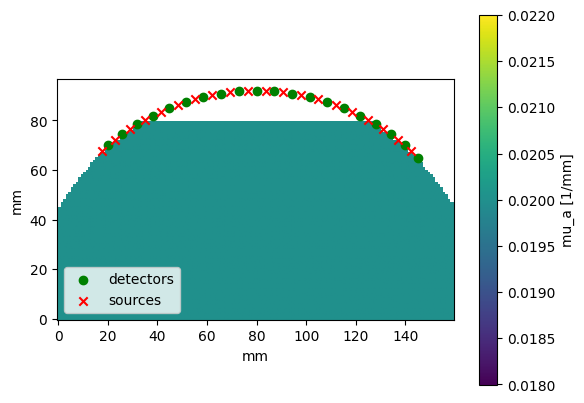

In [3]:
from problems.hemisphere import (
    hemisphere_2d_sensors,
    hemisphere_2d_medium,
)

voxels_per_dim = 160

medium = hemisphere_2d_medium(voxels_per_dim)

noptodes = 20
sensors = hemisphere_2d_sensors(noptodes, medium)

medium.plot_mua(sensors, z_slice=medium.nz // 2)

## Forward

In [4]:
from solver import Solver, jacobian

solver = Solver(medium, sensors, tstart=0, tend=5e-9, tstep=5e-9)

In [5]:
nx, ny, nz = medium.nx, medium.ny, medium.nz
ndet, nsrc = sensors.ndet, sensors.nsrc
nt = solver.nt

In [6]:
# initialize arrays
J = np.zeros((nz, ny, nx, nt, ndet, nsrc))
data_bg = np.zeros((nt, ndet, nsrc))
data_true = np.zeros((nt, ndet, nsrc))

In [7]:
from tqdm.notebook import tqdm

nphoton = 1e5

# run forward for all sources (for both the ground truth and background)
for src_idx in tqdm(range(nsrc), desc="Processing sources"):
    solver.medium = medium
    res_bg, cfg_bg = solver.forward(src_idx, random_seed=1, nphoton=nphoton)
    J[..., src_idx] = jacobian(res_bg, cfg_bg)

Processing sources:   0%|          | 0/20 [00:00<?, ?it/s]

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1


issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


#######################################################################
- code name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=100000 np=100000 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	134 ms
retrieving fields ... 	detected 13021 photons, total: 13021	transfer complete:	140 ms
normalizing raw data ...	source 1, normalization factor alpha=2000.000000
data normalization complete : 145 ms
simulated 100000 photons (100000) with 442368 threads (repeat x1)
MCX simulation speed: 3448.28 photon/ms
total simulated energy: 100000.00	absorbed: 42.13111%
(loss due to initial specular reflection is excluded in the total)
########################################################

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


urojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                                                             #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


urojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                                                             #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=214 np=214 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	23 ms
retrieving fields ... 	detected 214 photons, total: 214	transfer complete:	30 ms
normalizing raw data ...	normalization factor for detector 1 alpha=172392.781250
normalization factor for detector 2 alpha=517.827393
normalization factor for detector 3 alpha=176.049393
normalization factor for detector 4 alpha=11.332635
normalization factor for detector 5 alpha=0.000000
normalization factor for detector 6 alpha=0.000000
normalization factor for detector 7 alpha=0.000000
normalization factor for detector 8 alpha=0.000000
normalization factor for detector 9 alpha=

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

## SVD

In [8]:
J_cpu = J.reshape((nz * ny * nx * nt, ndet * nsrc))
J_cpu.shape

(12800, 400)

In [13]:
from guti.svd import compute_svd_gpu

s = compute_svd_gpu(J_cpu)

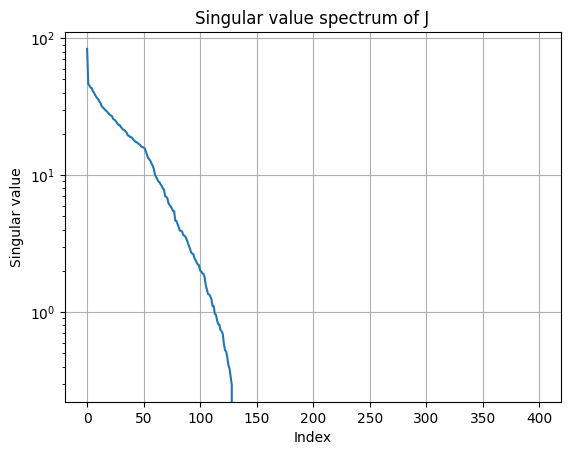

In [12]:
from guti.svd import plot_svd

plot_svd(s)

## Save the singular value spectrum

In [11]:
from guti.data_utils import save_svd

save_svd(s, "fnirs_cw")

Saved singular value spectrum to /home/rhotter/gut-of-imaging/results/fnirs_cw_svd_spectrum.npz
